In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.utils import load_img
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the VGG16 model

model = VGG16()

In [2]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
for i in range(len(model.layers)):
    if 'conv' not in model.layers[i].name:
        continue
    
    filters, biases = model.layers[i].get_weights()
    print("layer number",model.layers[i].name, filters.shape)


layer number block1_conv1 (3, 3, 3, 64)
layer number block1_conv2 (3, 3, 64, 64)
layer number block2_conv1 (3, 3, 64, 128)
layer number block2_conv2 (3, 3, 128, 128)
layer number block3_conv1 (3, 3, 128, 256)
layer number block3_conv2 (3, 3, 256, 256)
layer number block3_conv3 (3, 3, 256, 256)
layer number block4_conv1 (3, 3, 256, 512)
layer number block4_conv2 (3, 3, 512, 512)
layer number block4_conv3 (3, 3, 512, 512)
layer number block5_conv1 (3, 3, 512, 512)
layer number block5_conv2 (3, 3, 512, 512)
layer number block5_conv3 (3, 3, 512, 512)


In [6]:
filters, biases = model.layers[1].get_weights()

In [7]:
# normalize filter values to 0-1 so we can visualize them

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

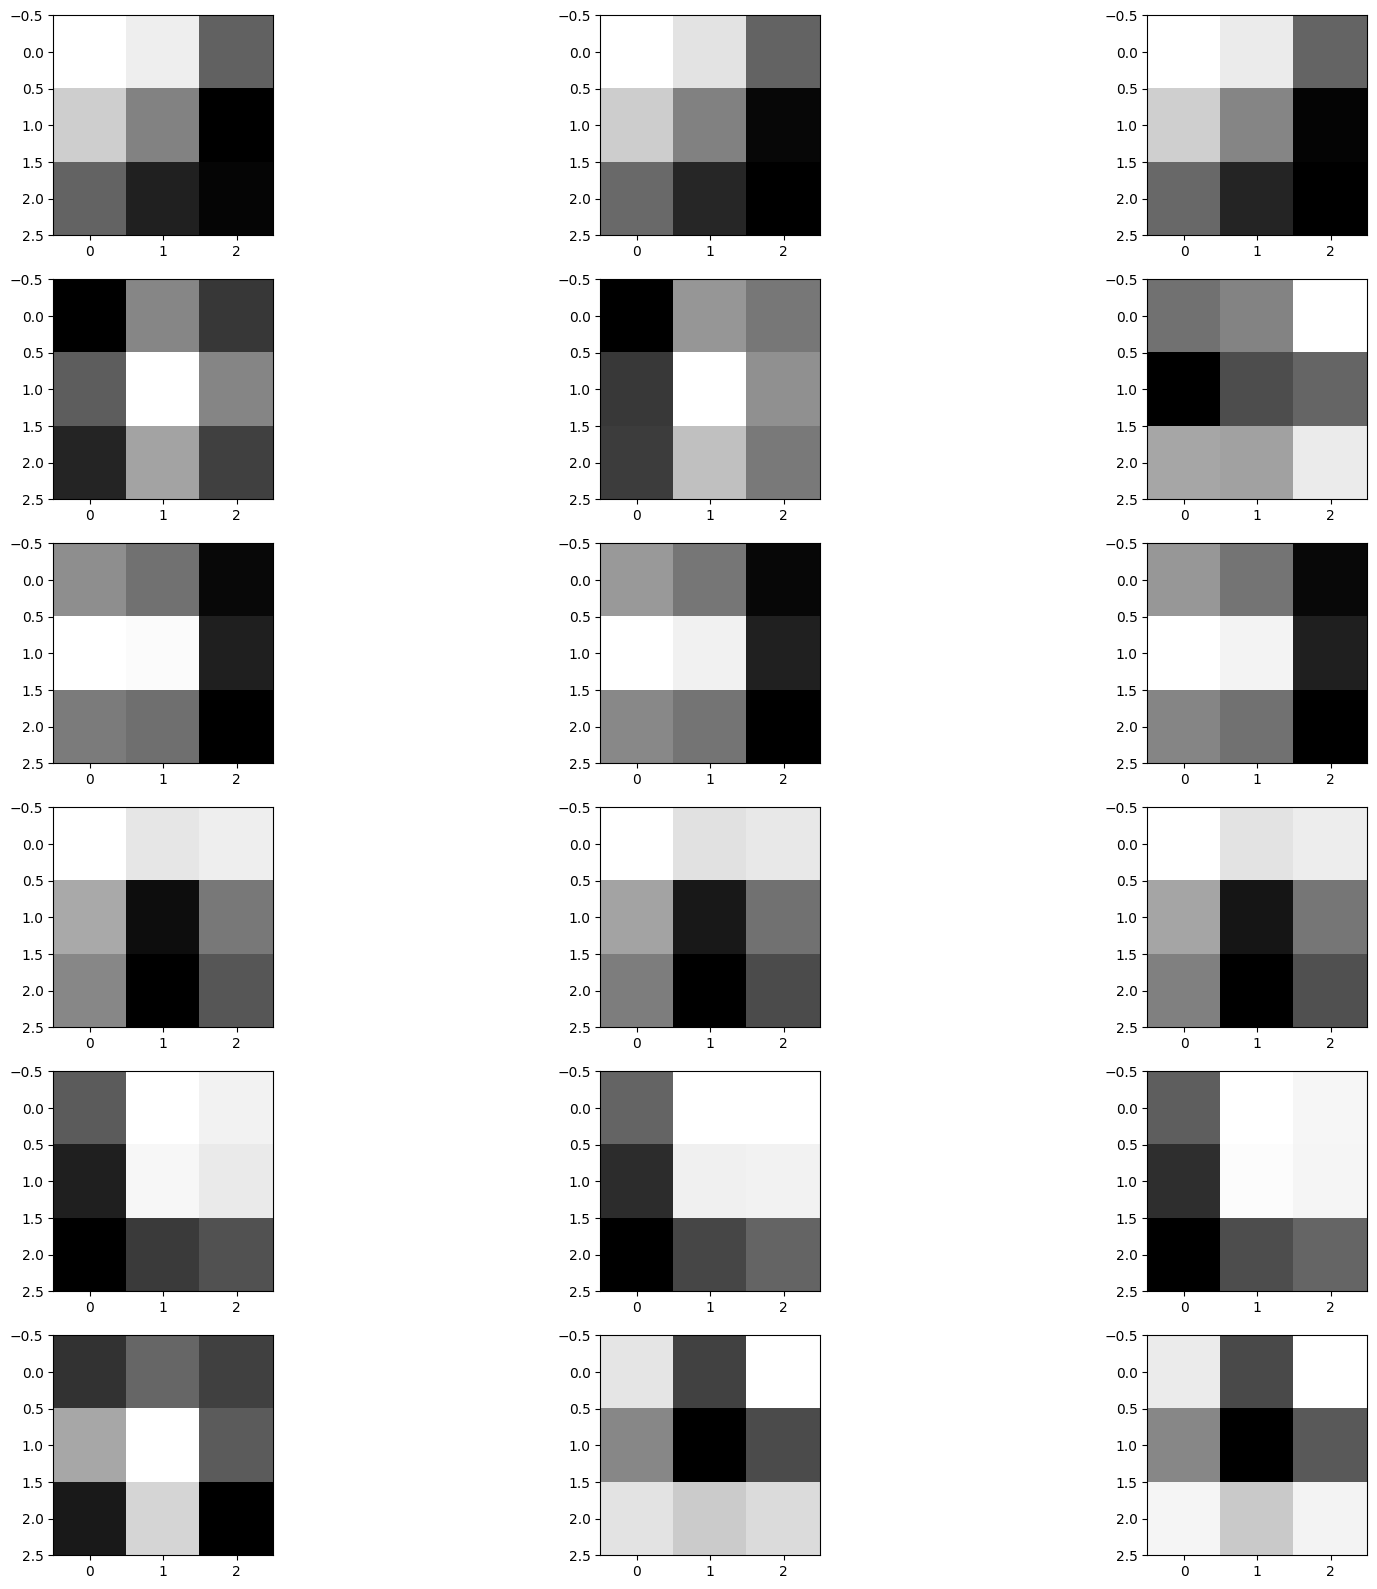

In [8]:
from matplotlib import pyplot
import numpy as np

n_filter =6
ix=1
fig = pyplot.figure(figsize=(20,20))

for i in range(n_filter):
    f = filters[:, :, :, i]
    for j in range(3):
        # plot filter channel in spatial domain
        pyplot.subplot(n_filter,3, ix)
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()


In [ ]:


model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [20]:


image = load_img('data/dhoni.png', target_size=(224, 224))


image = img_to_array(image)

image = np.expand_dims(image, axis=0)

image = preprocess_input(image)

In [23]:
feature_maps = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
if len(feature_maps.shape) == 4:
    for i in range(feature_maps.shape[3]):
        pyplot.subplot(8, 8, i+1)
        pyplot.imshow(feature_maps[0, :, :, i], cmap='gray')

    pyplot.show()
else:
    print(f"Unexpected feature_maps shape: {feature_maps.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Unexpected feature_maps shape: (1, 1000)


<Figure size 2000x1500 with 0 Axes>